In [38]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from warnings import filterwarnings

filterwarnings(action = "ignore")

# data reading .......

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train) 
train.head()

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
train.shape
 

(891, 12)

In [40]:
test.shape 

(418, 11)

In [41]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
test.isnull().sum()  

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
train.describe()  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Bar graph of people according tickte class who servived')

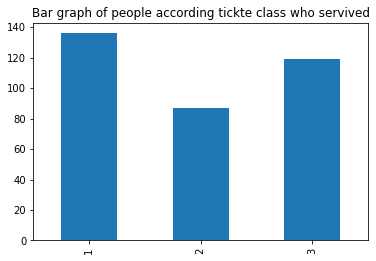

In [44]:
# ploting the data relations 

plt.figure(1)
train.loc[train['Survived'] == 1 ,"Pclass" ].value_counts().sort_index().plot.bar()
plt.title("Bar graph of people according tickte class who servived") 

Text(0.5, 1.0, "Bar graph of people according tickte class who didn't servived")

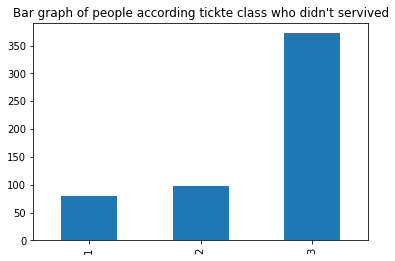

In [45]:
plt.figure(2) 
train.loc[train['Survived'] == 0 ,"Pclass"].value_counts().sort_index().plot.bar()  
plt.title("Bar graph of people according tickte class who didn't servived")

([<matplotlib.patches.Wedge at 0x1f1ed315130>,
 [Text(0.2896903324689856, 1.0611689362556787, 'c = cherbourg'),
  Text(-1.099618855696737, -0.028954657590776995, 's = southampton'),
  Text(0.3175222399329322, -1.0531759715963775, 'q =  queenstown')],
 [Text(0.15801290861944667, 0.5788194197758246, '41.52%'),
  Text(-0.599792103107311, -0.01579344959496927, '17.80%'),
  Text(0.17319394905432664, -0.5744596208707513, '40.68%')])

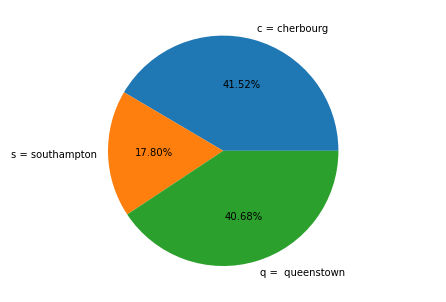

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis("equal") 
l = ["c = cherbourg", "s = southampton" , "q =  queenstown" ]
s = [0.546464,0.23434 , 0.5354343]
ax.pie(s,labels = l,autopct = "%1.2f%%")

In [47]:
# understanding the hidden patterns of data 
train[ ["SibSp","Survived"]].groupby(["SibSp"] , as_index = False ).mean().sort_values(by="Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [48]:
train[ ["Pclass","Survived"]].groupby(["Pclass"] , as_index = False ).mean().sort_values(by="Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [49]:

#removing the unneccesary data 


train = train.drop(["Ticket"], axis = 1)
test = test.drop(["Ticket"], axis = 1 )
train = train.drop(["Name"], axis = 1)
test = test.drop(["Name"], axis = 1 )
train = train.drop(["Cabin"], axis = 1)
test = test.drop(["Cabin"], axis = 1 )

In [50]:

# selecting important features 

column_train = [ "Age" , "Pclass" ,"SibSp" ,"Parch" ,"Fare","Sex","Embarked"]


X = train[column_train]
Y = train["Survived"]

In [51]:
X["Age"] = X["Age"].fillna( X["Age"].median())

X["Age"].isnull().sum()

0

In [52]:
d = {"male" : 0 ,"female":1}

X['Sex'] = X["Sex"].apply( lambda x:d[x])

X.head()

,Age,Pclass,SibSp,Parch,Fare,Sex,Embarked
0,22.0,3,1,0,7.2500,0,S
1,38.0,1,1,0,71.2833,1,C
2,26.0,3,0,0,7.9250,1,S
3,35.0,1,1,0,53.1000,1,S
4,35.0,3,0,0,8.0500,0,S


In [53]:
X["Embarked"] = X["Embarked"].fillna( "C")


e = {"S" : 2,"Q":1,"C":0}

X["Embarked"] = X["Embarked"].apply(lambda x:e[x])

In [54]:
X.head()

,Age,Pclass,SibSp,Parch,Fare,Sex,Embarked
0,22.0,3,1,0,7.2500,0,2
1,38.0,1,1,0,71.2833,1,0
2,26.0,3,0,0,7.9250,1,2
3,35.0,1,1,0,53.1000,1,2
4,35.0,3,0,0,8.0500,0,2


In [55]:
# MODEl BUILDING And training  
from sklearn.model_selection import train_test_split

X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y, test_size = 0.3,random_state = 7)

In [56]:
# Logistic regression  

from sklearn.linear_model import LogisticRegression 

model = LogisticRegression() 
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
print(Y_pred)

[0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1
 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 1 0 1 1 1 0 0 0]


In [57]:
from sklearn.metrics import accuracy_score

lll = accuracy_score(Y_test,Y_pred) * 100 
print(lll)

75.74626865671642


In [58]:
# Stnadard vector machine 

from sklearn.svm import SVC 

model1 = SVC()
model1.fit(X_train,Y_train)
y_pred1 = model1.predict(X_test)
from sklearn.metrics import accuracy_score
lll1 = accuracy_score(Y_test,y_pred1) * 100 
print(lll1)

66.04477611940298


In [59]:
# Naive bayes algorithm

from sklearn.naive_bayes import GaussianNB 

model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)
print(y_pred3)

[0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1
 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0
 0 1 0 1 1 1 0 0 0]


In [60]:
from sklearn.metrics import accuracy_score
lll3 = accuracy_score(Y_test,y_pred3) * 100 
print(lll3)

76.86567164179104


In [61]:
# decision Treee model 

from sklearn.tree import DecisionTreeClassifier 

model4 =DecisionTreeClassifier( criterion= "entropy" ,random_state = 7)

model4.fit(X_train,Y_train)
y_pred4 = model1.predict(X_test)
from sklearn.metrics import accuracy_score
lll4= accuracy_score(Y_test,y_pred4) * 100 
print(lll4)

66.04477611940298
